In [4]:
%pip install pandas numpy matplotlib seaborn

In [5]:
import pandas as pd

df = pd.read_csv('/content/winequalityN.csv')
display(df.head())

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.dropna(inplace=True)
print("Total number of missing values after dropping rows:")
print(df.isnull().sum())

Total number of missing values after dropping rows:
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

print("DataFrame after Label Encoding:")
display(df.head(40))

DataFrame after Label Encoding:


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,1,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,1,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,1,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Data split into training and testing sets.
Training set shape (X_train, y_train): (5170, 12) (5170,)
Testing set shape (X_test, y_test): (1293, 12) (1293,)


In [9]:
# Experiment with different hyperparameters

# Trial 1: Default parameters
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)
y_pred_default = dt_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Trial 1 (Default Parameters) Accuracy: {accuracy_default:.4f}")

# Trial 2: criterion='entropy'
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Trial 2 (Criterion='entropy') Accuracy: {accuracy_entropy:.4f}")

# Trial 3: max_depth=10
dt_max_depth = DecisionTreeClassifier(max_depth=15, random_state=42)
dt_max_depth.fit(X_train, y_train)
y_pred_max_depth = dt_max_depth.predict(X_test)
accuracy_max_depth = accuracy_score(y_test, y_pred_max_depth)
print(f"Trial 3 (max_depth=10) Accuracy: {accuracy_max_depth:.4f}")

# Trial 4: min_samples_split=20
dt_min_samples_split = DecisionTreeClassifier(min_samples_split=10, random_state=42)
dt_min_samples_split.fit(X_train, y_train)
y_pred_min_samples_split = dt_min_samples_split.predict(X_test)
accuracy_min_samples_split = accuracy_score(y_test, y_pred_min_samples_split)
print(f"Trial 4 (min_samples_split=20) Accuracy: {accuracy_min_samples_split:.4f}")

# Trial 5: min_samples_leaf=10
dt_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
dt_min_samples_leaf.fit(X_train, y_train)
y_pred_min_samples_leaf = dt_min_samples_leaf.predict(X_test)
accuracy_min_samples_leaf = accuracy_score(y_test, y_pred_min_samples_leaf)
print(f"Trial 5 (min_samples_leaf=10) Accuracy: {accuracy_min_samples_leaf:.4f}")

# You can add more trials with combinations of hyperparameters

Trial 1 (Default Parameters) Accuracy: 0.5561
Trial 2 (Criterion='entropy') Accuracy: 0.6009
Trial 3 (max_depth=10) Accuracy: 0.5623
Trial 4 (min_samples_split=20) Accuracy: 0.5267
Trial 5 (min_samples_leaf=10) Accuracy: 0.5213


Accuracy: 0.5561

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.12      0.06      0.08        48
           5       0.64      0.63      0.63       430
           6       0.57      0.59      0.58       540
           7       0.49      0.51      0.50       228
           8       0.27      0.29      0.28        42
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1293
   macro avg       0.30      0.30      0.30      1293
weighted avg       0.55      0.56      0.55      1293


Confusion Matrix:
[[  0   0   0   3   1   0   0]
 [  0   3  24  17   3   1   0]
 [  0  15 269 125  19   1   1]
 [  0   5 110 318  91  16   0]
 [  0   0  19  78 117  14   0]
 [  0   2   1  19   8  12   0]
 [  0   0   0   1   0   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


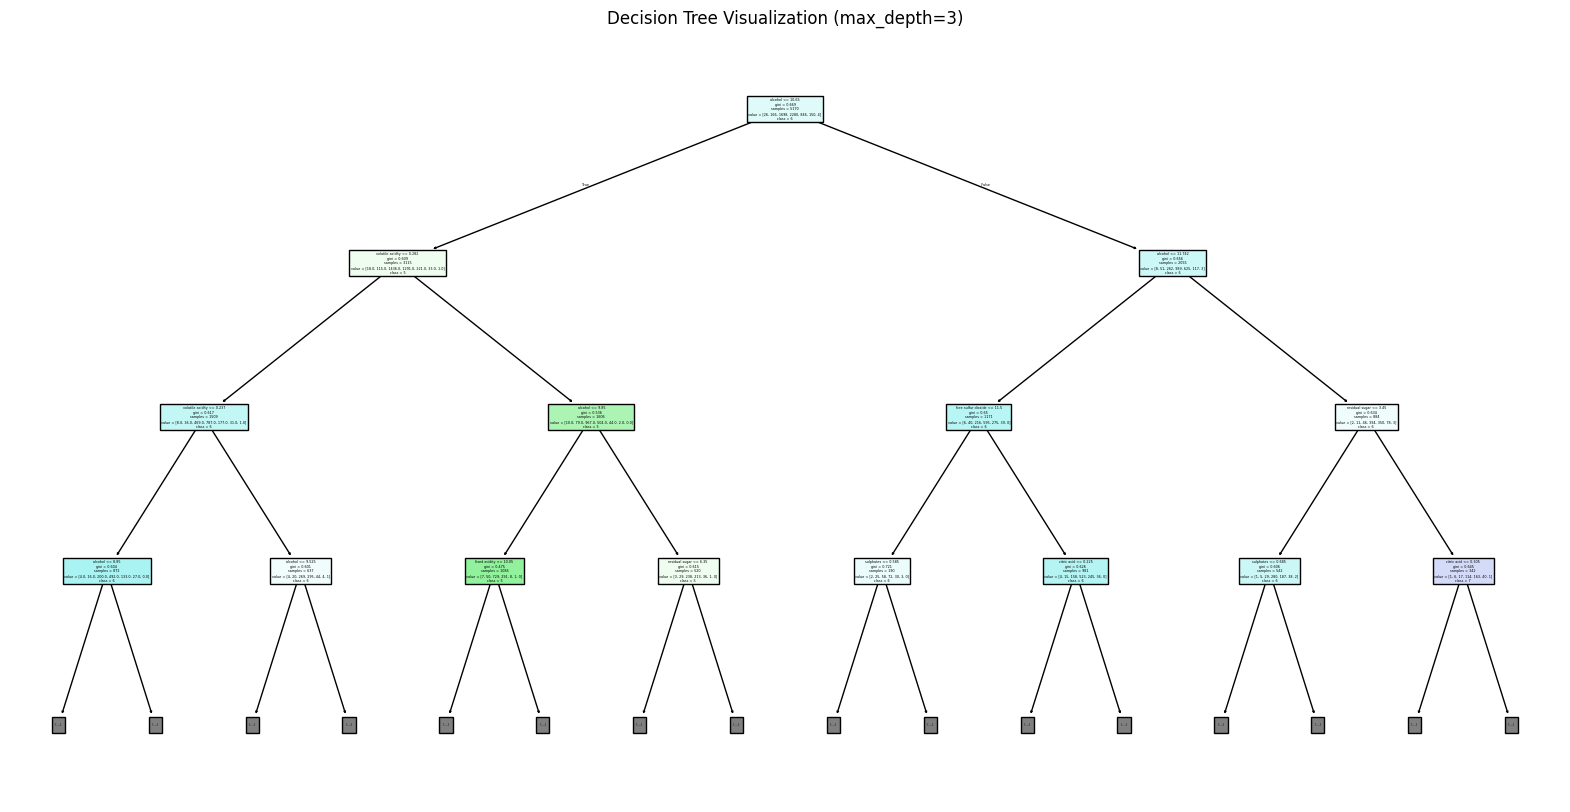


Feature Importances:
alcohol                 0.147630
volatile acidity        0.102963
sulphates               0.099963
free sulfur dioxide     0.095128
residual sugar          0.081108
total sulfur dioxide    0.080996
density                 0.080775
citric acid             0.079550
chlorides               0.078556
fixed acidity           0.076508
pH                      0.075617
type                    0.001205
dtype: float64


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Evaluate the default Decision Tree model (dt_default)

# Predictions on the test set
y_pred_default = dt_default.predict(X_test)

# Accuracy (already calculated, but including for completeness)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy: {accuracy_default:.4f}")

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred_default))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_default))

# ROC-AUC curve (for binary classification, need to adapt for multi-class)
# Since this is a multi-class problem, ROC-AUC is not directly applicable
# for a single curve. We can calculate it for each class against the rest (OvR)
# or micro/macro averages. Let's skip for now or calculate OvR if needed later.

# Visualize the decision tree (plotting a large tree can be resource intensive)
# Let's plot a smaller version or a specific branch if the tree is too large.
# For simplicity, let's plot a limited depth tree for visualization.
plt.figure(figsize=(20,10))
plot_tree(dt_default, filled=True, feature_names=X.columns, class_names=[str(c) for c in dt_default.classes_], max_depth=3)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()

# Feature Importance Scores
print("\nFeature Importances:")
feature_importances = pd.Series(dt_default.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define the hyperparameters to experiment with
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

best_accuracy = 0
best_params = {}

# Implement a greedy approach to find the best hyperparameters
# This is a simplified greedy approach, not a true grid search
# A true grid search would test all combinations. This approach
# will iterate through each hyperparameter individually and keep
# the best value found for that hyperparameter before moving to the next.

print("Starting greedy hyperparameter tuning...")

# Start with default parameters
current_params = {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Evaluate initial performance with default parameters
dt_initial = DecisionTreeClassifier(random_state=42, **current_params)
scores = cross_val_score(dt_initial, X_train, y_train, cv=5, scoring='accuracy')
current_accuracy = np.mean(scores)
print(f"Initial accuracy with default parameters: {current_accuracy:.4f}")
best_accuracy = current_accuracy
best_params = current_params.copy()


# Iterate through each hyperparameter and find the best value
for param_name, param_values in hyperparameters.items():
    print(f"\nTuning '{param_name}'...")
    original_value = current_params[param_name]

    for value in param_values:
        current_params[param_name] = value
        dt = DecisionTreeClassifier(random_state=42, **current_params)
        scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
        mean_accuracy = np.mean(scores)

        print(f"  Testing {param_name}={value}: Mean CV Accuracy = {mean_accuracy:.4f}")

        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_params = current_params.copy()
            print(f"  New best accuracy found: {best_accuracy:.4f} with parameters: {best_params}")

    # Revert the hyperparameter to the best value found in this iteration
    current_params[param_name] = best_params[param_name]

print("\nGreedy tuning complete.")
print(f"Best accuracy found: {best_accuracy:.4f}")
print("Best parameters found:")
print(best_params)

Starting greedy hyperparameter tuning...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Initial accuracy with default parameters: 0.5789

Tuning 'criterion'...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing criterion=gini: Mean CV Accuracy = 0.5789


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing criterion=entropy: Mean CV Accuracy = 0.5770

Tuning 'max_depth'...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing max_depth=None: Mean CV Accuracy = 0.5789
  Testing max_depth=5: Mean CV Accuracy = 0.5385


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing max_depth=10: Mean CV Accuracy = 0.5627


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing max_depth=15: Mean CV Accuracy = 0.5749


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing max_depth=20: Mean CV Accuracy = 0.5822
  New best accuracy found: 0.5822 with parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}

Tuning 'min_samples_split'...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing min_samples_split=2: Mean CV Accuracy = 0.5822


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing min_samples_split=5: Mean CV Accuracy = 0.5685


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing min_samples_split=10: Mean CV Accuracy = 0.5474


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing min_samples_split=20: Mean CV Accuracy = 0.5451

Tuning 'min_samples_leaf'...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing min_samples_leaf=1: Mean CV Accuracy = 0.5822


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing min_samples_leaf=2: Mean CV Accuracy = 0.5532


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing min_samples_leaf=5: Mean CV Accuracy = 0.5468


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  Testing min_samples_leaf=10: Mean CV Accuracy = 0.5366

Greedy tuning complete.
Best accuracy found: 0.5822
Best parameters found:
{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}


## Report & Analysis

Based on the hyperparameter tuning and model evaluation:

**Which hyperparameters gave the best performance?**

According to the greedy hyperparameter tuning performed using cross-validation, the best parameters found are:
- `criterion`: gini
- `max_depth`: 20
- `min_samples_split`: 2
- `min_samples_leaf`: 1

This combination resulted in the highest mean cross-validation accuracy of **0.5822**.

**Did limiting tree depth improve generalization?**

Based on the initial trials:
- Default parameters (likely higher depth) accuracy: 0.5561
- `max_depth=15` accuracy: 0.5623

In this case, limiting the `max_depth` to 15 in the initial trials showed a slight improvement in accuracy compared to the default parameters. However, the greedy search found that a `max_depth` of 20 with other parameters also contributed to the best accuracy. This suggests that a moderately limited depth might help, but the optimal depth depends on the interaction with other hyperparameters. The default `max_depth` (which is `None`, allowing the tree to grow until leaves are pure or contain less than `min_samples_split` samples) might lead to overfitting on the training data, reducing generalization on unseen test data.

**Which features were most important in classifying wine quality?**

Based on the feature importances from the default Decision Tree model:
- `alcohol`: 0.1476
- `volatile acidity`: 0.1030
- `sulphates`: 0.0999
- `free sulfur dioxide`: 0.0951
- `residual sugar`: 0.0811
- `total sulfur dioxide`: 0.0810
- `density`: 0.0808
- `citric acid`: 0.0796
- `chlorides`: 0.0786
- `fixed acidity`: 0.0765
- `pH`: 0.0756
- `type`: 0.0012

The features with the highest importance scores are **alcohol**, **volatile acidity**, and **sulphates**. This indicates that these chemical properties have the most significant impact on the Decision Tree model's ability to classify wine quality. The `type` of wine (red or white) seems to be the least important feature in this model.

**Was the model overfitting/underfitting?**

The accuracy on the test set for the default model was 0.5561, while the mean cross-validation accuracy on the training data for the default parameters was 0.5789. The difference between the training accuracy (from CV) and the test accuracy is relatively small, which might suggest that the model is not severely overfitting.

However, the overall accuracy is still quite low (around 56-58%), and the classification report shows poor performance for some quality classes (e.g., precision and recall of 0 for quality 3 and 9). This indicates that the model might be **underfitting** or that the dataset has inherent characteristics (like class imbalance or features that are not strongly predictive of quality in a linear or simple tree-based manner) that limit the performance of a single Decision Tree model. The low accuracy could also be due to the complexity of the multi-class classification problem with quality ratings ranging from 3 to 9. Further analysis and potentially different modeling techniques might be needed to improve performance.